In [7]:
import os 
os.chdir('C:\python-training\eyeglad\Amazon\Ads_analyze\market_explore')
print(os.getcwd())
import pandas as pd
import Amazon_datacleaning as cl
import Amazon_counting as counting
import table_visualize as tv
from table_visualize import chinese_font

C:\python-training\eyeglad\Amazon\Ads_analyze\market_explore


In [8]:
chinese_font()
# 讀取數據
data = pd.read_csv('C:/python-training/eyeglad/Amazon/data/marketing/240711_AmazonSales_OverFitGlasses.csv')

In [9]:
# 清理價格欄位
data['Price'] = cl.clean_price(data)

# 清理評分欄位
data['Star Rating'], data['Global Rating Count'] = cl.clean_star(data)

# 清理銷量欄位
data['Sales in the Last Month'] = cl.clean_monthly_sales(data)


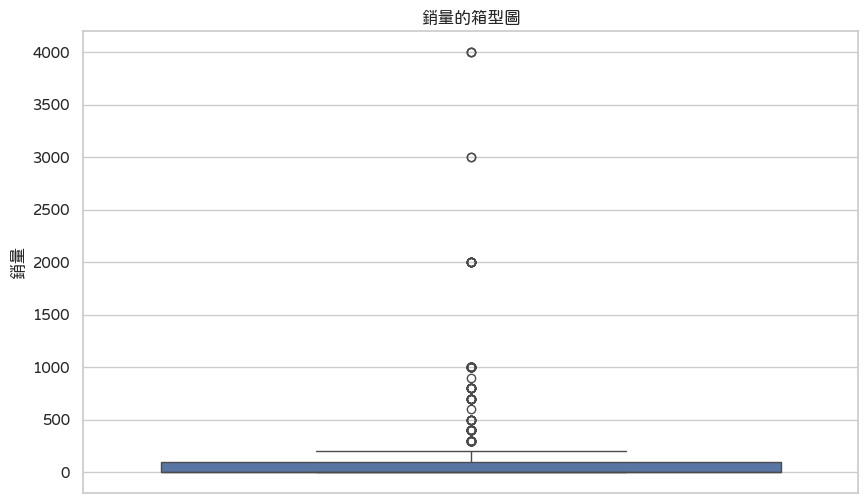

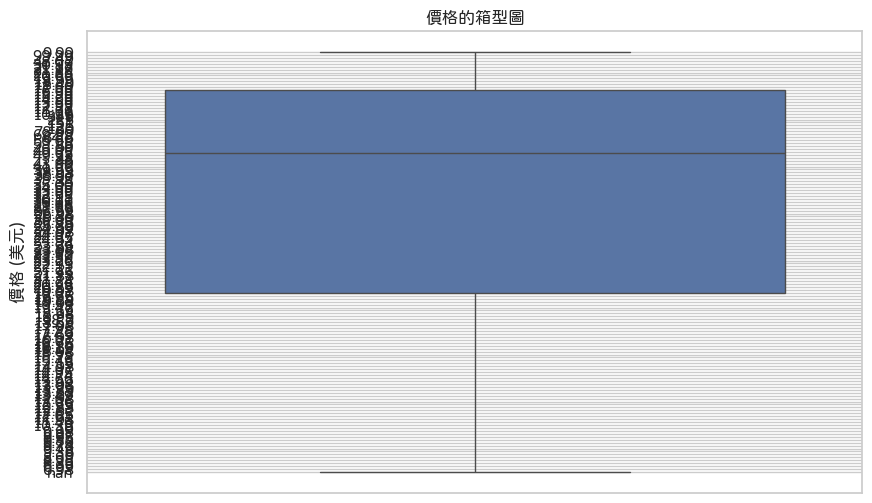

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 繪製銷量的箱型圖
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Sales in the Last Month'])
plt.title('銷量的箱型圖')
plt.ylabel('銷量')
plt.show()

# 繪製價格的箱型圖
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Price'])
plt.title('價格的箱型圖')
plt.ylabel('價格 (美元)')
plt.show()


In [11]:
# 計算每個品牌的平均銷量和平均價格
brand_sales_price = data.groupby('Brand Name').agg({
    'Sales in the Last Month': 'mean',
    'Price': 'mean'
}).reset_index()

# 將品牌按平均銷量降序排列
brand_sales_price = brand_sales_price.sort_values(by='Sales in the Last Month', ascending=False)


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 設置圖表風格
sns.set_theme(style="whitegrid")

# 繪製平均銷量的條形圖
plt.figure(figsize=(14, 8))
sns.barplot(x='Sales in the Last Month', y='Brand Name', data=brand_sales_price, palette='viridis')
plt.title('不同品牌的平均銷量')
plt.xlabel('平均銷量')
plt.ylabel('品牌')
plt.show()

# 繪製平均價格的條形圖
plt.figure(figsize=(14, 8))
sns.barplot(x='Price', y='Brand Name', data=brand_sales_price, palette='viridis')
plt.title('不同品牌的平均價格')
plt.xlabel('平均價格 (美元)')
plt.ylabel('品牌')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# 創建標準化對象
scaler = StandardScaler()

# 對銷量和價格進行標準化處理
brand_sales_price[['Sales in the Last Month', 'Price']] = scaler.fit_transform(brand_sales_price[['Sales in the Last Month', 'Price']])


NameError: name 'brand_sales_price' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler

# 創建標準化對象
scaler = StandardScaler()

# 對銷量和價格進行標準化處理
brand_sales_price[['Sales in the Last Month', 'Price']] = scaler.fit_transform(brand_sales_price[['Sales in the Last Month', 'Price']])


In [ ]:
# 計算每10%的百分位數
quantiles = brand_sales_price['Sales in the Last Month'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# 創建一個新列來表示每個品牌所在的百分位數組
brand_sales_price['Quantile Group'] = pd.cut(brand_sales_price['Sales in the Last Month'], bins=quantiles, labels=False, include_lowest=True)


In [ ]:
# 列出每個百分位數組中的品牌
quantile_brands = brand_sales_price.groupby('Quantile Group')['Brand Name'].apply(list).reset_index()


In [ ]:
# 選擇一個百分位數組中的品牌（例如第50百分位數）
selected_quantile = 5
selected_brands = quantile_brands.loc[quantile_brands['Quantile Group'] == selected_quantile, 'Brand Name'].values[0]

# 選擇一個品牌進行詳細分析
selected_brand = selected_brands[0]


In [ ]:
# 計算每10%的百分位數並處理重複值
quantiles = brand_sales_price['Sales in the Last Month'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]).drop_duplicates()

# 創建一個新列來表示每個品牌所在的百分位數組
brand_sales_price['Quantile Group'] = pd.cut(brand_sales_price['Sales in the Last Month'], bins=quantiles, labels=False, include_lowest=True, duplicates='drop')

# 列出每個百分位數組中的品牌
quantile_brands = brand_sales_price.groupby('Quantile Group')['Brand Name'].apply(list).reset_index()

# 選擇一個百分位數組中的品牌（例如第50百分位數）
selected_quantile = 5
selected_brands = quantile_brands.loc[quantile_brands['Quantile Group'] == selected_quantile, 'Brand Name'].values[0]

# 選擇一個品牌進行詳細分析
selected_brand = selected_brands[0]

quantile_brands, selected_brand


In [ ]:
# 篩選出 "CO-Z" 品牌的數據
coz_data = data[data['Brand Name'] == 'CO-Z']


In [ ]:
# 計算 "CO-Z" 品牌的平均銷量和價格
average_sales = coz_data['Sales in the Last Month'].mean()
average_price = coz_data['Price'].mean()

average_sales, average_price


In [ ]:
# 提取 "CO-Z" 品牌的評分和評分數量信息
average_star_rating = coz_data['Star Rating'].mean()
total_rating_count = coz_data['Global Rating Count'].sum()

average_star_rating, total_rating_count


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# 確保第一次使用需要下載相關資源
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# 產品描述中的關鍵詞分析
descriptions = coz_data['Product Description'].dropna().astype(str)
all_words = [word.lower() for desc in descriptions for word in word_tokenize(desc) if word.isalnum() and word not in stop_words]
word_counts = Counter(all_words)

# 提取出現頻率最高的10個關鍵詞
common_keywords = word_counts.most_common(10)

common_keywords


In [ ]:
from collections import Counter
import re

# 自定義停用詞
stop_words = set(["the", "and", "is", "in", "to", "with", "a", "of", "for", "on", "it", "this", "that", "as", "an"])

# 產品描述中的關鍵詞分析
descriptions = coz_data['Product Description'].dropna().astype(str)
all_words = [word.lower() for desc in descriptions for word in re.findall(r'\b\w+\b', desc) if word.isalnum() and word not in stop_words]
word_counts = Counter(all_words)

# 提取出現頻率最高的10個關鍵詞
common_keywords = word_counts.most_common(10)

common_keywords
